In [29]:
import pandas as pd
cohort = pd.read_csv('cohort.csv')

In [30]:
cohort_counts = cohort.set_index('Acquisition Month', drop=True)

In [31]:
# Extract cohort sizes from the first column of cohort_counts
cohort_sizes = cohort_counts.iloc[:,0] 

In [32]:
# Calculate retention by dividing the counts with the cohort sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

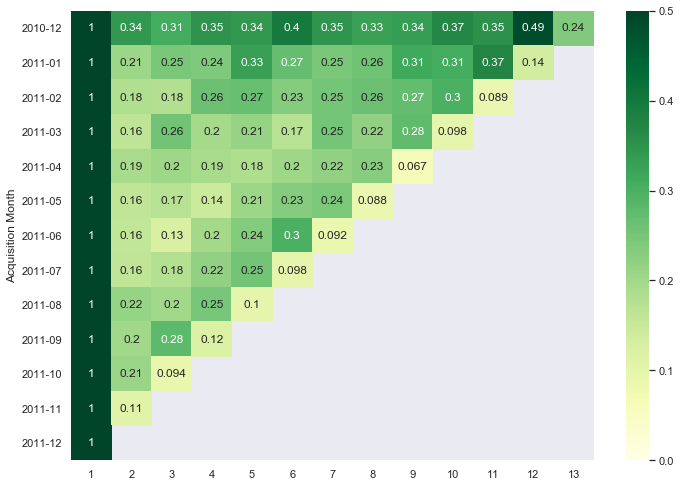

In [36]:
# paint retention rate with seaborn heatmap
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(retention, annot=True, vmin=0, vmax=0.5, cmap="YlGn")

\begin{align}
\ average \ CLV & = \ average\ REVENUE * \frac{RETENTION\ RATE}{CHURN\ RATE} \\
\end{align}

Depending on the business model: 
    
**Basic CLV** - assumes customer lifespan is 36 months and calculates based on average monthly revenue;

**Granular CLV** - assumes customer lifespan is 36 months and calculates based on average customer purchase freq and their\
average purchase value;

**Traditional CLV** - based on churn rate, assumes churn is definitive.

In [44]:
# Calculate the mean retention rate by calculating mean for each month then mean for whole year
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate the mean churn rate
churn = 1 - retention
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.24; Churn rate: 0.76


#### Basic CLV

In [79]:
import numpy as np
online = pd.read_csv('online.csv')
online = online.rename(columns={'  TotalSum': 'TotalSum'})

# Calculate monthly spend per customer
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum()

# Calculate average monthly spend
monthly_revenue = np.mean(monthly_revenue)

# Define lifespan to 36 months
lifespan_months = 36

# Calculate basic CLV
clv_basic = monthly_revenue * lifespan_months

# Print the basic CLV value
print('Average basic CLV is {:.1f} USD;'.format(clv_basic))
print('Assuming that customers stay with us for 36 months.')

Average basic CLV is 499.1 USD;
Assuming that customers stay with us for 36 months.


#### Granular CLV

In [80]:
# Calculate average revenue per invoice
revenue_per_purchase = online.groupby(['InvoiceNo'])['TotalSum'].mean().mean()

# Calculate average number of unique invoices per customer per month
frequency_per_month = online.groupby(['CustomerID','InvoiceMonth'])['InvoiceNo'].nunique().mean()

# Define lifespan to 36 months
lifespan_months = 36

# Calculate granular CLV
clv_granular = revenue_per_purchase * frequency_per_month * lifespan_months

# Print granular CLV value
print('Average granular CLV is {:.1f} USD'.format(clv_granular))
print('Assuming that customers stay with us for 36 months.')

Average granular CLV is 499.1 USD
Assuming that customers stay with us for 36 months.


#### Traditional CLV

In [81]:
# Calculate monthly spend per customer
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()

# Calculate average monthly retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate average monthly churn rate
churn_rate = 1 - retention_rate

# Calculate traditional CLV 
clv_traditional = monthly_revenue * (retention_rate / churn_rate)

# Print traditional CLV and the retention rate values
print('Average traditional CLV is {:.1f} USD at {:.1f} % retention_rate;'.format(clv_traditional, retention_rate*100))
print('Assuming customer never comes back.')

Average traditional CLV is 4.4 USD at 24.2 % retention_rate;
Assuming customer never comes back.
